# Dogs vs Cats 🐕🐈
This notebook is about the dogs vs cat challenge hosted by kaggle: https://www.kaggle.com/competitions/dogs-vs-cats-redux-kernels-edition

google colab link: https://colab.research.google.com/drive/1Ri8Dkq4i3u6wORG9uwTccFaBNZ8g9yty?usp=sharing

### Dataset:
The train folder contains 25,000 images of dogs and cats. For each image 1 = dog and 0 = cat

---

So this is a binary classification problem

Baseline 80% : made by an svm and described in a 2007 paper with the title "Machine learning attacks against the Asirra CAPTCHA"



## Table of Contents:


>[Dogs vs Cats 🐕🐈](#scrollTo=rHCR3GGn47fI)

>>>[Dataset:](#scrollTo=rHCR3GGn47fI)

>>[Table of Contents:](#scrollTo=qFlz-QBg8L06)

>>[Load packages](#scrollTo=j7vANCrN9w2E)

>>[Getting the data ready](#scrollTo=XQbvFXkLA_Jr)

>>[Becoming one with the data](#scrollTo=KJ974nDlDjnG)

>>>[Class distribution](#scrollTo=zRXrQyiVFBBB)

>>>[Images Samples](#scrollTo=suMO1dWmHE7m)

>>>[Preprocessing our images and creating our input pipeline](#scrollTo=V5rl1_NGH_rb)

>>[Developing our modes](#scrollTo=SfQ0VD5ZJVUY)

>>>[1.One Block VGG](#scrollTo=NhrzPg6qQk8_)

>>>[2.Two Block VGG](#scrollTo=xbJngFM4QgQr)

>>>[3.Three Block VGG](#scrollTo=6yZDdnn8TmUu)

>>>[4.Three Block VGG + Dropout Regularization](#scrollTo=yuvHR6pwMQkv)

>>>[5.Training model 3 for 30 more epochs](#scrollTo=ZhXUpg3QPys2)

>>>[6.Three Block VGG + Dropout + Data Augmentation](#scrollTo=HujPsXGPlEh0)

>>>[7.Model_4 + 30 more epochs](#scrollTo=1M1XvVq1snVO)

>>[Testing on custom data](#scrollTo=a7XgiWbA3sYl)

>>[Recap on this notebook:](#scrollTo=7ln01Ql24Tyj)



## Load packages

In [ ]:
# imports
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the data ready

In [ ]:
import tensorflow_datasets as tfds
(train_data , test_data) , ds_info = tfds.load('cats_vs_dogs',
                                               split = ["train[:80%]", "train[80%:]"],
                                               as_supervised = True,
                                               shuffle_files = True,
                                               with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete9PX3UX/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
# Examining our meta data
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmp7bn4wymqtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [ ]:
# Getting the classnames
class_names = ds_info.features['label'].names
class_names

['cat', 'dog']

## Becoming one with the data

In [ ]:
# Take one sample of the training data
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image , label in train_one_sample:
    print(f"""
      Image shape: {image.shape}
      Image datatype: {image.dtype}
      Label: {class_names[label.numpy()]}
      Label datatype: {label.dtype}
      """)


      Image shape: (500, 306, 3)
      Image datatype: <dtype: 'uint8'>
      Label: dog
      Label datatype: <dtype: 'int64'>
      


In [ ]:
image , image.shape

(<tf.Tensor: shape=(500, 306, 3), dtype=uint8, numpy=
 array([[[152, 139, 131],
         [190, 181, 174],
         [182, 177, 173],
         ...,
         [133, 126,  98],
         [127, 122,  92],
         [127, 122,  92]],
 
        [[139, 126, 118],
         [181, 170, 164],
         [179, 174, 170],
         ...,
         [134, 127,  99],
         [129, 124,  94],
         [129, 124,  94]],
 
        [[125, 111, 102],
         [167, 157, 148],
         [177, 172, 168],
         ...,
         [135, 128, 100],
         [131, 126,  96],
         [131, 126,  96]],
 
        ...,
 
        [[145, 147, 133],
         [146, 148, 134],
         [148, 150, 137],
         ...,
         [135, 101,  99],
         [152, 112, 113],
         [156, 111, 116]],
 
        [[146, 148, 134],
         [148, 150, 136],
         [149, 151, 138],
         ...,
         [140, 106, 104],
         [121,  79,  81],
         [124,  77,  83]],
 
        [[147, 149, 135],
         [149, 151, 137],
         [150,

In [ ]:
# Getting the minimum and maximum of the images
tf.reduce_min(image) , tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [ ]:
# Getting our labels and images
images = []
labels = []
for image , label in train_data:
  images.append(image.numpy())
  labels.append(label.numpy())

In [ ]:
# View images array
images

[array([[[ 23,  20,  11],
         [ 25,  22,   5],
         [ 99,  94,  64],
         ...,
         [ 57,  40,  22],
         [ 67,  48,  31],
         [ 70,  51,  34]],
 
        [[ 31,  29,  17],
         [ 21,  18,   1],
         [ 82,  77,  48],
         ...,
         [ 65,  50,  31],
         [ 74,  57,  39],
         [ 70,  53,  35]],
 
        [[ 67,  64,  47],
         [ 18,  13,   0],
         [ 53,  47,  21],
         ...,
         [ 55,  42,  25],
         [ 66,  50,  34],
         [ 61,  45,  29]],
 
        ...,
 
        [[ 85,  76,  45],
         [ 85,  78,  49],
         [ 85,  80,  51],
         ...,
         [123, 114,  99],
         [121, 112,  97],
         [122, 113,  98]],
 
        [[ 82,  73,  44],
         [ 87,  80,  51],
         [ 88,  83,  53],
         ...,
         [124, 115,  98],
         [123, 114,  97],
         [121, 112,  95]],
 
        [[ 80,  71,  42],
         [ 86,  79,  50],
         [ 85,  79,  47],
         ...,
         [128, 119, 102],
  

In [ ]:
# View labels array
labels

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,


### Class distribution
Let's inspect the train data to check the cat/dog distribution.

Text(0.5, 1.0, 'Cats and Dogs')

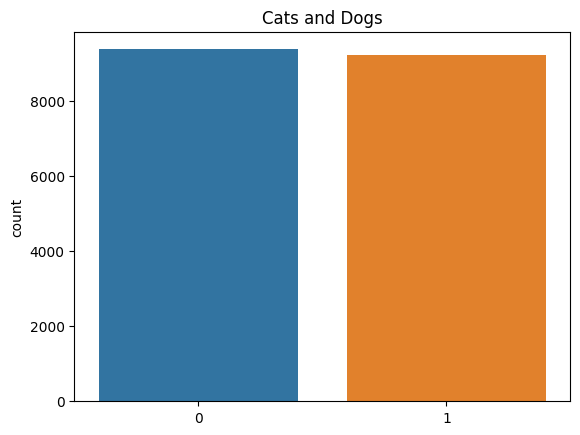

In [ ]:
# Visualize the count plot
sns.countplot(x = labels)
plt.title('Cats and Dogs')

mmm it seems they are close but not equal, thats because tensorflow removed some corrupted images from the dataset

### Images Samples
Let's represent some of the images

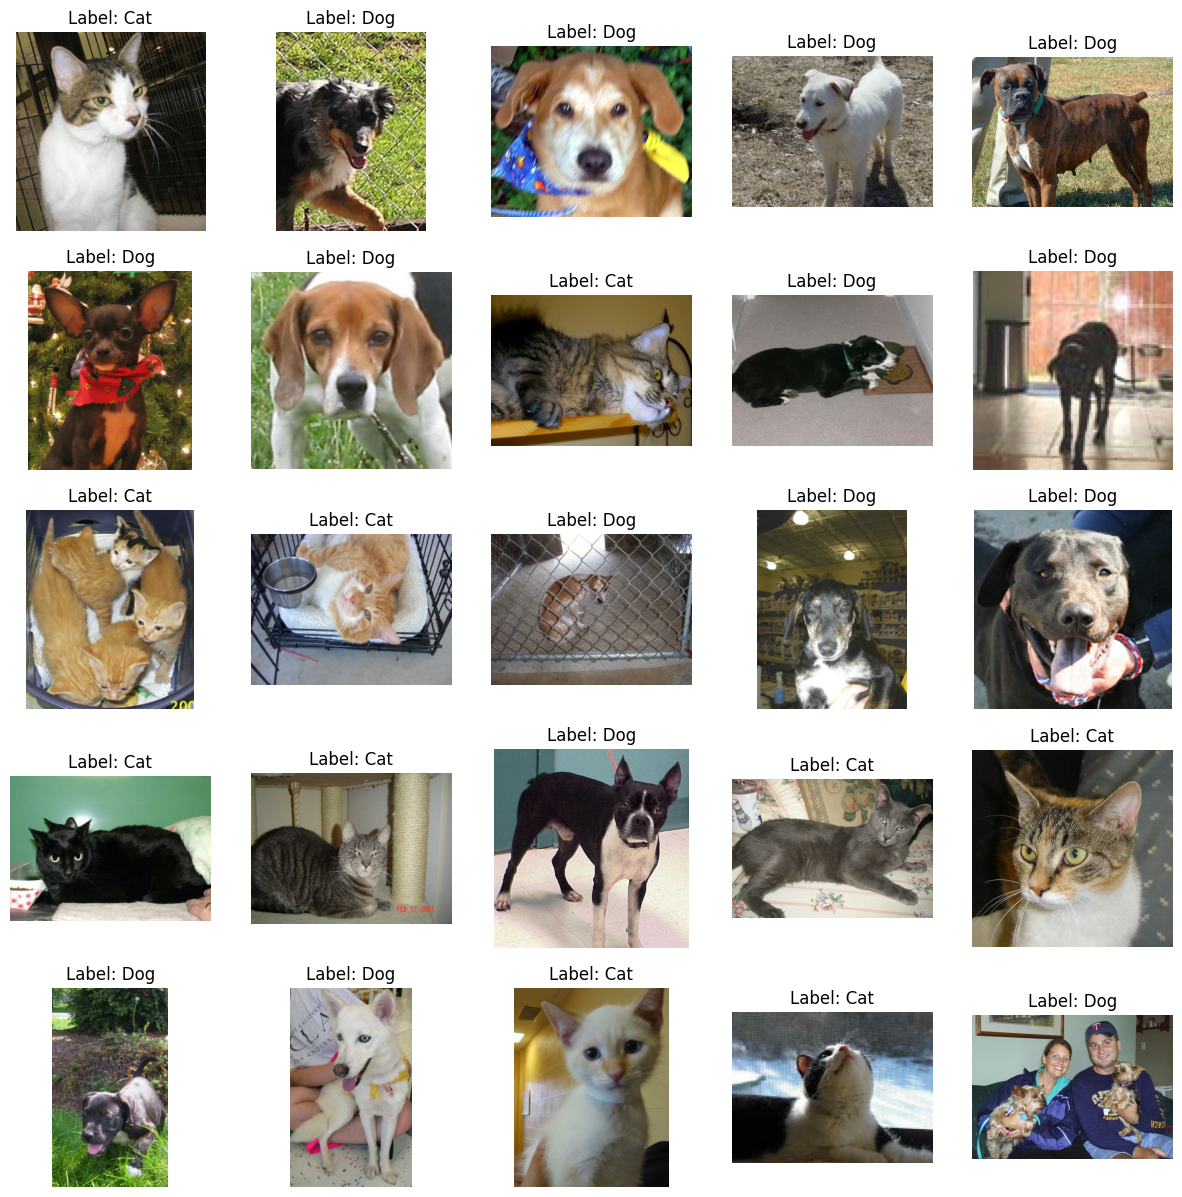

In [ ]:
def show_images(images=images , labels=labels):
  f , ax = plt.subplots(5 , 5 , figsize = (15 ,15))
  for i in range(25):
    label = labels[i]
    img = images[i]
    if label == 1:
      str_label = 'Dog'
    else :
      str_label = 'Cat'
    ax[i // 5 , i % 5].imshow(img)
    ax[i // 5 , i % 5].axis('off')
    ax[i // 5 , i % 5].set_title("Label: {}".format(str_label))
  plt.show

show_images()

### Preprocessing our images and creating our input pipeline

In [ ]:
# Our preprocessing functions
def preprocess_img(image , label , scale = True):
  image = tf.cast(image , tf.float32)
  image = tf.image.resize(image , size=(224 , 224))
  if(scale):
    image = image / 255.
  return image , label

In [ ]:
# Batching and creating our data input pipelines
train_data_pipe = train_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

test_data_pipe = test_data.map(map_func = preprocess_img , num_parallel_calls = tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

train_data_pipe , test_data_pipe

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Developing our modes
A baseline model will establish a minimum model performance to which all of our other models can be compared , as well as a model architecture that we can use as the basis of study and improvement

baseline model = model_0 --> validation accuracy = ~72%

### 1.One Block VGG

In [ ]:
# Creating our 1 block vgg
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Input

inputs = Input(shape = (224 , 224 , 3))

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(inputs)
x = MaxPooling2D(2)(x)
x = Flatten()(x)

x = Dense(128 , activation = 'relu' , kernel_initializer = 'he_uniform')(x)

outputs = Dense(1 , activation = 'sigmoid')(x)

model_0 = tf.keras.Model(inputs , outputs)

#Compile model
model_0.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 , momentum = 0.9),
                metrics = ['accuracy'])

model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 401408)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               51380352  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                           

In [ ]:
# Fitting our model
history_0 = model_0.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/20
582/582 [==============================] - 50s 85ms/step - loss: 0.6992 - accuracy: 0.5403 - val_loss: 0.6787 - val_accuracy: 0.5888
Epoch 2/20
582/582 [==============================] - 51s 87ms/step - loss: 0.6830 - accuracy: 0.5436 - val_loss: 0.6766 - val_accuracy: 0.5888
Epoch 3/20
582/582 [==============================] - 49s 84ms/step - loss: 0.6709 - accuracy: 0.5880 - val_loss: 0.6606 - val_accuracy: 0.6169
Epoch 4/20
582/582 [==============================] - 55s 94ms/step - loss: 0.6610 - accuracy: 0.6038 - val_loss: 0.6627 - val_accuracy: 0.6064
Epoch 5/20
582/582 [==============================] - 48s 82ms/step - loss: 0.6539 - accuracy: 0.6168 - val_loss: 0.6506 - val_accuracy: 0.6266
Epoch 6/20
582/582 [==============================] - 50s 87ms/step - loss: 0.6487 - accuracy: 0.6215 - val_loss: 0.6471 - val_accuracy: 0.6333
Epoch 7/20
582/582 [==============================] - 49s 85ms/step - loss: 0.6412 - accuracy: 0.6321 - val_loss: 0.6445 - val_accuracy:

In [ ]:
# plot loss curves function
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure()
  plt.plot(epochs , loss , label = 'training_loss')
  plt.plot(epochs , val_loss , label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [ ]:
model_0.evaluate(test_data_pipe)

146/146 [==============================] - 8s 51ms/step - loss: 0.6492 - accuracy: 0.7281


[0.6491502523422241, 0.7280739545822144]

 After 10 epochs our model accuracy is ~73 %

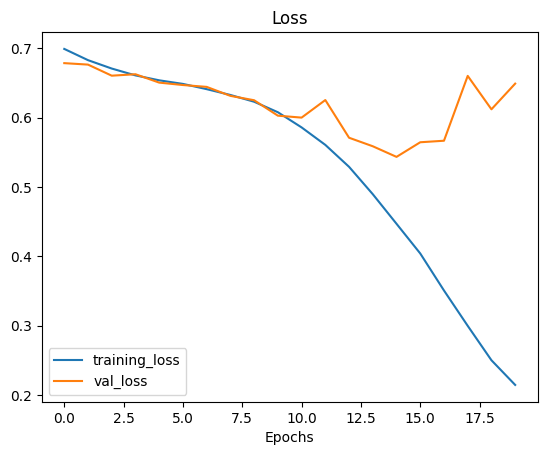

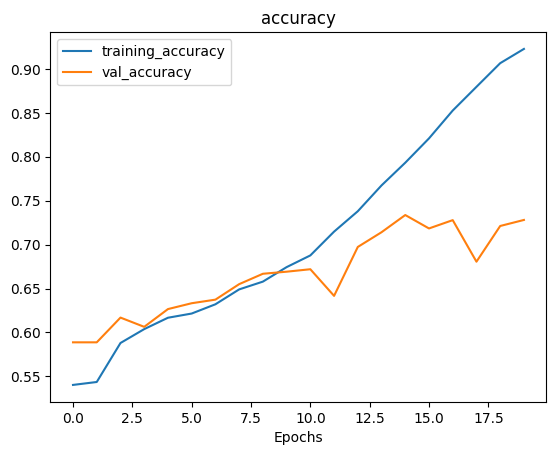

In [ ]:
plot_loss_curves(history_0)

Our model is severly overfitting !!

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/DogsvsCats2/One_Block_VGG"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_0.save(save_dir)

# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

146/146 [==============================] - 8s 53ms/step - loss: 0.6492 - accuracy: 0.7281


[0.6491502523422241, 0.7280739545822144]

###2.Two Block VGG

In [ ]:
# Creating our 2 block vgg
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Input

inputs = Input(shape = (224 , 224 , 3))

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(inputs)
x = MaxPooling2D(2)(x)
x = Conv2D(62 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)

x = Dense(128 , activation = 'relu' , kernel_initializer = 'he_uniform')(x)

outputs = Dense(1 , activation = 'sigmoid')(x)

model_1 = tf.keras.Model(inputs , outputs)

#Compile model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 , momentum = 0.9),
                metrics = ['accuracy'])

model_1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 62)      17918     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 56, 56, 62)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 194432)            0   

In [ ]:
# Fitting our model
history_1 = model_1.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/20
582/582 [==============================] - 52s 87ms/step - loss: 0.6822 - accuracy: 0.6040 - val_loss: 0.6245 - val_accuracy: 0.6363
Epoch 2/20
582/582 [==============================] - 55s 94ms/step - loss: 0.5756 - accuracy: 0.6963 - val_loss: 0.5513 - val_accuracy: 0.7289
Epoch 3/20
582/582 [==============================] - 53s 91ms/step - loss: 0.5108 - accuracy: 0.7485 - val_loss: 0.5349 - val_accuracy: 0.7377
Epoch 4/20
582/582 [==============================] - 51s 88ms/step - loss: 0.4564 - accuracy: 0.7819 - val_loss: 0.5102 - val_accuracy: 0.7532
Epoch 5/20
582/582 [==============================] - 53s 90ms/step - loss: 0.4100 - accuracy: 0.8125 - val_loss: 0.5504 - val_accuracy: 0.7264
Epoch 6/20
582/582 [==============================] - 52s 89ms/step - loss: 0.3567 - accuracy: 0.8448 - val_loss: 0.5906 - val_accuracy: 0.7100
Epoch 7/20
582/582 [==============================] - 48s 82ms/step - loss: 0.2981 - accuracy: 0.8758 - val_loss: 0.5521 - val_accuracy:

In [ ]:
model_1.evaluate(test_data_pipe)

146/146 [==============================] - 7s 51ms/step - loss: 1.1900 - accuracy: 0.7543


[1.189985990524292, 0.7542992234230042]

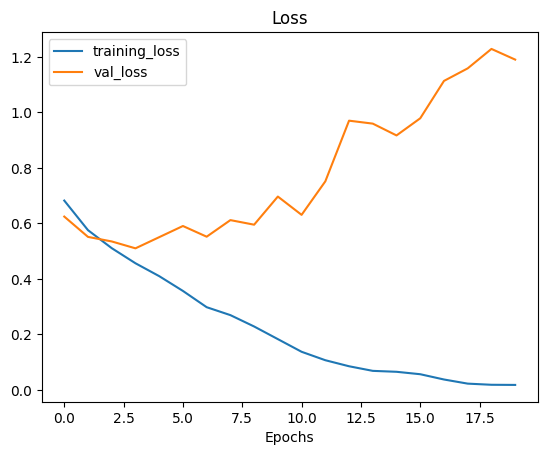

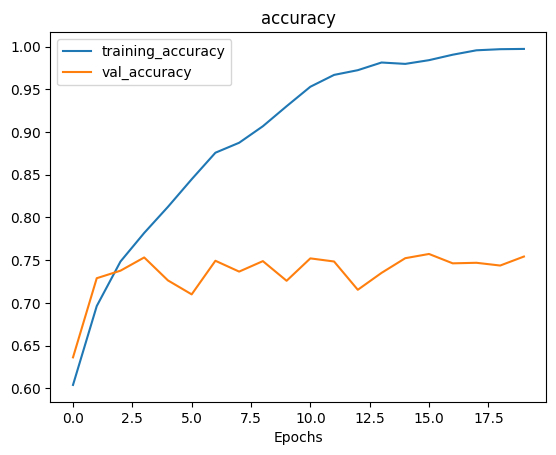

In [ ]:
plot_loss_curves(history_1)

Mmmm , the model accuracy score improved by ~2% . However, Even with our more complex architecture the model seems to overfit. Maybe because of the 128 dense layer at the end. Let's make another try with a more complex model then let's use regularization techniques like:
1. Data augmentation
2. Dropout

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/DogsvsCats3/Two_Block_VGG"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_1.save(save_dir)

# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

146/146 [==============================] - 9s 60ms/step - loss: 1.1900 - accuracy: 0.7543


[1.189985990524292, 0.7542992234230042]

###3.Three Block VGG

In [ ]:
# Our 3 block vgg
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Input

inputs = Input(shape = (224 , 224 , 3))

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(inputs)
x = MaxPooling2D(2)(x)
x = Conv2D(62 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)

x = Dense(128 , activation = 'relu' , kernel_initializer = 'he_uniform')(x)

outputs = Dense(1 , activation = 'sigmoid')(x)

model_2 = tf.keras.Model(inputs , outputs)

#Compile model
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 , momentum = 0.9),
                metrics = ['accuracy'])

model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 62)      17918     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 56, 56, 62)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 56, 56, 128)       7155

In [ ]:
# Fitting our model
history_2 = model_2.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/20
582/582 [==============================] - 57s 95ms/step - loss: 0.6812 - accuracy: 0.5616 - val_loss: 0.6914 - val_accuracy: 0.5413
Epoch 2/20
582/582 [==============================] - 50s 85ms/step - loss: 0.6276 - accuracy: 0.6401 - val_loss: 0.6119 - val_accuracy: 0.6432
Epoch 3/20
582/582 [==============================] - 53s 91ms/step - loss: 0.5590 - accuracy: 0.7091 - val_loss: 0.5702 - val_accuracy: 0.6915
Epoch 4/20
582/582 [==============================] - 54s 93ms/step - loss: 0.5025 - accuracy: 0.7527 - val_loss: 0.5061 - val_accuracy: 0.7545
Epoch 5/20
582/582 [==============================] - 54s 93ms/step - loss: 0.4600 - accuracy: 0.7809 - val_loss: 0.5750 - val_accuracy: 0.6941
Epoch 6/20
582/582 [==============================] - 54s 93ms/step - loss: 0.4197 - accuracy: 0.8071 - val_loss: 0.5112 - val_accuracy: 0.7440
Epoch 7/20
582/582 [==============================] - 53s 91ms/step - loss: 0.3806 - accuracy: 0.8294 - val_loss: 0.4691 - val_accuracy:

In [ ]:
model_2.evaluate(test_data_pipe)

146/146 [==============================] - 8s 52ms/step - loss: 0.8945 - accuracy: 0.7840


[0.8945024013519287, 0.7839638590812683]

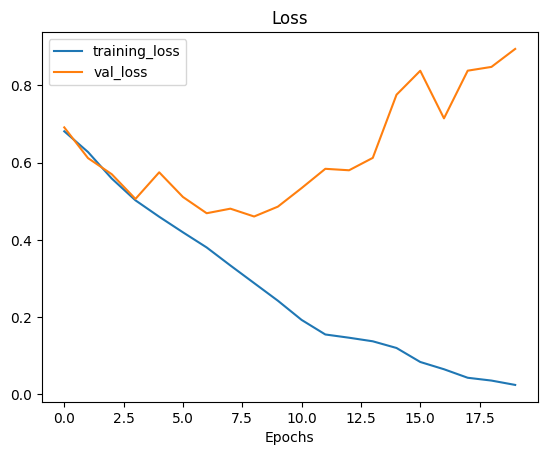

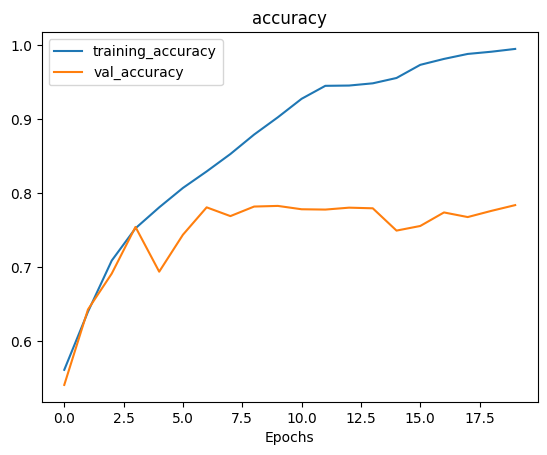

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/DogsvsCats3/Three_Block_VGG"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_2.save(save_dir)

# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

146/146 [==============================] - 8s 54ms/step - loss: 0.8945 - accuracy: 0.7840


[0.8945024013519287, 0.7839638590812683]

Our model 2 validation accuracy is more than that of model 1 with about 3%. However, our model seems to be overfitting so we need to make something about that.

1. Data augmentation
2. Dropout regularization

Our next model will be like model_2 but with a data augmentation layer

###4.Three Block VGG + Dropout Regularization

In [ ]:
# Our 3 block vgg
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Input , Dropout

inputs = Input(shape = (224 , 224 , 3))

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(inputs)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(62 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(128 , activation = 'relu' , kernel_initializer = 'he_uniform')(x)
x = Dropout(0.5)(x)
outputs = Dense(1 , activation = 'sigmoid')(x)

model_3 = tf.keras.Model(inputs , outputs)

#Compile model
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 , momentum = 0.9),
                metrics = ['accuracy'])

model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 62)      17918     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 62)       0         
 2D)                                                       

In [ ]:
# Fitting our model
history_3 = model_3.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

In [ ]:
# Evaluation our model
model_3.evaluate(test_data_pipe)

146/146 [==============================] - 9s 63ms/step - loss: 0.4592 - accuracy: 0.7859


[0.4591999650001526, 0.7858985662460327]

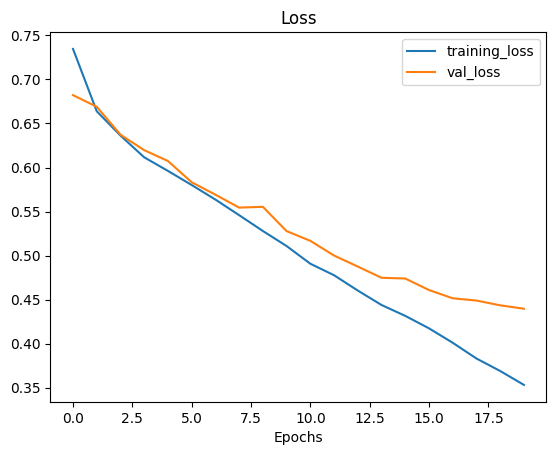

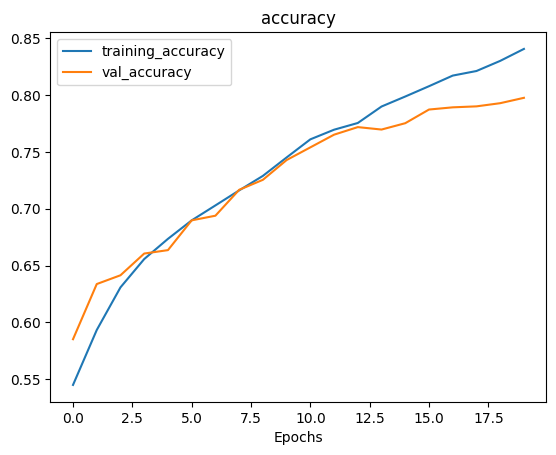

In [ ]:
# Plot loss curves
plot_loss_curves(history_3)

Amazing! Droupout regularization has allowed us to reduce overfitting as it allows the model to generalzie better as it will not depend on a certain feature to classify the data

Also It seems our training accuracy and validation accuracy are moving together. Let's see what will happen if we train our model for a further 30 epochs

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/DogsvsCats4/Three_Block_VGG_data_reg"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_3.save(save_dir)

# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

146/146 [==============================] - 12s 78ms/step - loss: 0.6104 - accuracy: 0.8145


[0.6103609800338745, 0.814488410949707]

###5.Training model 3 for 30 more epochs

In [ ]:
# Let's Create our early stopping callback in case our model start overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'val_accuracy',
                                        patience = 10,
                                        verbose = 2)

In [ ]:
def get_total_history(history1 , history2):
  total_acc = history1.history['accuracy'] + history2.history['accuracy']
  total_loss = history1.history['loss'] + history2.history['loss']

  total_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
  total_val_loss = history1.history['val_loss'] + history2.history['val_loss']

  plt.figure(figsize = (12 , 6))
  plt.subplot(2 , 1 , 1)
  plt.plot(total_loss , label = "loss")
  plt.plot(total_val_loss , label = "Validation loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend();

  plt.subplot(2 , 1 , 2)
  plt.plot(total_acc , label = "accuracy")
  plt.plot(total_val_acc , label = "Validation accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend();


In [ ]:
history_3_2 = model_3.fit(train_data_pipe,
                          epochs = 50,
                          steps_per_epoch = len(train_data_pipe),
                          validation_data = test_data_pipe,
                          validation_steps = len(test_data_pipe),
                          initial_epoch = 20,
                          callbacks = [early_stopping_callback])

Epoch 21/50
582/582 [==============================] - 61s 103ms/step - loss: 0.4153 - accuracy: 0.8074 - val_loss: 0.4520 - val_accuracy: 0.7883
Epoch 22/50
582/582 [==============================] - 64s 110ms/step - loss: 0.4046 - accuracy: 0.8156 - val_loss: 0.4450 - val_accuracy: 0.7915
Epoch 23/50
582/582 [==============================] - 59s 102ms/step - loss: 0.3862 - accuracy: 0.8249 - val_loss: 0.4392 - val_accuracy: 0.7984
Epoch 24/50
582/582 [==============================] - 63s 108ms/step - loss: 0.3683 - accuracy: 0.8314 - val_loss: 0.4379 - val_accuracy: 0.7945
Epoch 25/50
582/582 [==============================] - 63s 108ms/step - loss: 0.3530 - accuracy: 0.8428 - val_loss: 0.4304 - val_accuracy: 0.7964
Epoch 26/50
582/582 [==============================] - 60s 102ms/step - loss: 0.3379 - accuracy: 0.8515 - val_loss: 0.4262 - val_accuracy: 0.8057
Epoch 27/50
582/582 [==============================] - 64s 109ms/step - loss: 0.3198 - accuracy: 0.8589 - val_loss: 0.4223 -

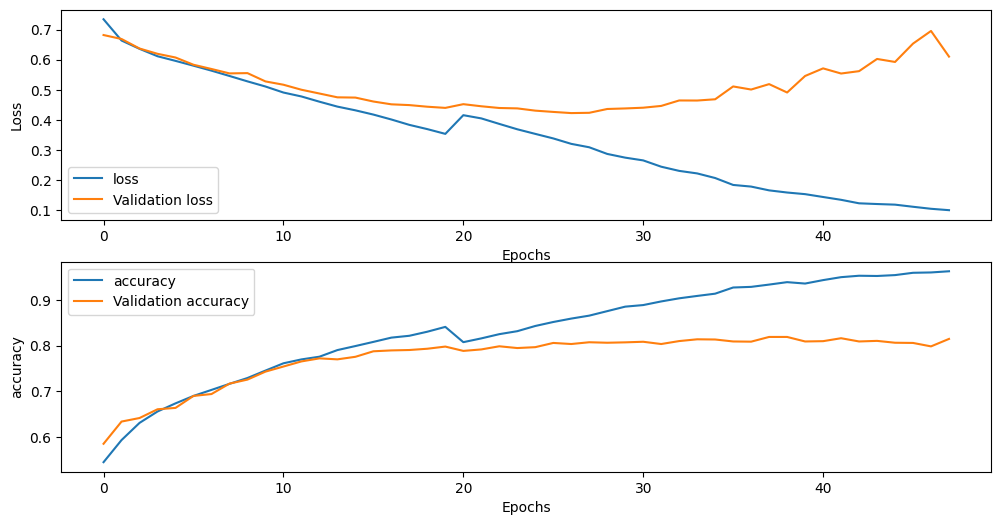

In [ ]:
get_total_history(history_3 , history_3_2)

Model_3 achieved ~0.82 validation accuracy but it overfitted drastically in the last 30 epochs. Let's Try Data augmentation

###6.Three Block VGG + Dropout + Data Augmentation

In [ ]:
# Creating our data augmentation layer
from tensorflow.keras import layers , Sequential

data_augmentation = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.Resizing(height = 224 , width = 224 , interpolation = 'bilinear')
] , name = 'data_augmentation')


In [ ]:
# Our 3 block vgg + dropout + data augmentation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Input

inputs = Input(shape = (224 , 224 , 3))

x = data_augmentation(inputs)

x = Conv2D(32 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(62 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(128 , 3 , padding = 'same' , activation = 'relu' ,  kernel_initializer = 'he_uniform')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)

x = Dense(128 , activation = 'relu' , kernel_initializer = 'he_uniform')(x)

outputs = Dense(1 , activation = 'sigmoid')(x)

model_4 = tf.keras.Model(inputs , outputs )

#Compile model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001 , momentum = 0.9),
                metrics = ['accuracy'])

model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 62)      17918     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 62)       0   

In [ ]:
# fitting our model
history_4 = model_4.fit(train_data_pipe,
                        epochs = 20,
                        steps_per_epoch = len(train_data_pipe),
                        validation_data = test_data_pipe,
                        validation_steps = len(test_data_pipe))

Epoch 1/20
582/582 [==============================] - 54s 89ms/step - loss: 0.6947 - accuracy: 0.5450 - val_loss: 0.6502 - val_accuracy: 0.6156
Epoch 2/20
582/582 [==============================] - 54s 92ms/step - loss: 0.6425 - accuracy: 0.6315 - val_loss: 0.6040 - val_accuracy: 0.6812
Epoch 3/20
582/582 [==============================] - 52s 89ms/step - loss: 0.6147 - accuracy: 0.6599 - val_loss: 0.5759 - val_accuracy: 0.7074
Epoch 4/20
582/582 [==============================] - 52s 89ms/step - loss: 0.5951 - accuracy: 0.6855 - val_loss: 0.5609 - val_accuracy: 0.7169
Epoch 5/20
582/582 [==============================] - 49s 83ms/step - loss: 0.5780 - accuracy: 0.6949 - val_loss: 0.5667 - val_accuracy: 0.7156
Epoch 6/20
582/582 [==============================] - 52s 90ms/step - loss: 0.5599 - accuracy: 0.7093 - val_loss: 0.5301 - val_accuracy: 0.7463
Epoch 7/20
582/582 [==============================] - 52s 90ms/step - loss: 0.5515 - accuracy: 0.7172 - val_loss: 0.5153 - val_accuracy:

In [ ]:
# Evaluating model_4
model_4.evaluate(test_data_pipe)

146/146 [==============================] - 13s 88ms/step - loss: 0.4364 - accuracy: 0.7889


[0.4364205300807953, 0.7889080047607422]

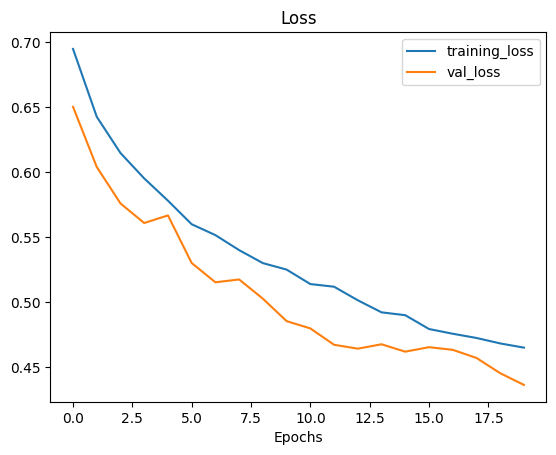

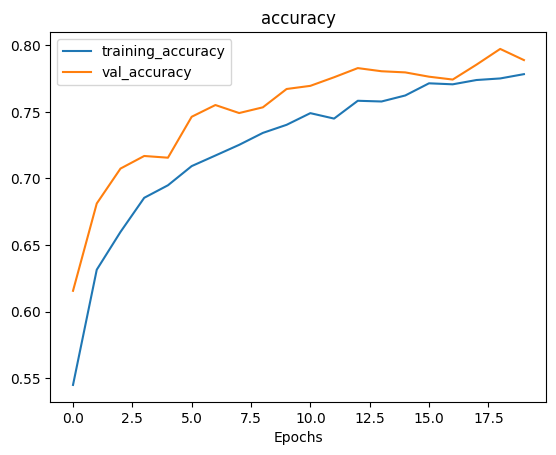

In [ ]:
plot_loss_curves(history_4)

Our model 4 have the similar validation accuracy as model 3 and model 2, but it is still not overfitting after 20 epochs. Let's train our model_4 for another 30 epochs.

This is due to the fact that data augmentation layer gives a regularization effect to our neural network

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/DogsvsCats4/Three_Block_VGG_dropout_data_aug"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_4.save(save_dir)

# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

###7.Model_4 + 30 more epochs


In [ ]:
# fitting our model
history_4_2 = model_4.fit(train_data_pipe,
                          epochs = 50,
                          initial_epoch = 20,
                          steps_per_epoch = len(train_data_pipe),
                          validation_data = test_data_pipe,
                          validation_steps = len(test_data_pipe),
                          callbacks = [early_stopping_callback])

Epoch 21/50
582/582 [==============================] - 67s 116ms/step - loss: 0.4562 - accuracy: 0.7834 - val_loss: 0.4369 - val_accuracy: 0.7930
Epoch 22/50
582/582 [==============================] - 57s 98ms/step - loss: 0.4530 - accuracy: 0.7838 - val_loss: 0.4442 - val_accuracy: 0.7949
Epoch 23/50
582/582 [==============================] - 49s 83ms/step - loss: 0.4481 - accuracy: 0.7875 - val_loss: 0.4401 - val_accuracy: 0.7994
Epoch 24/50
582/582 [==============================] - 54s 93ms/step - loss: 0.4431 - accuracy: 0.7927 - val_loss: 0.4583 - val_accuracy: 0.7878
Epoch 25/50
582/582 [==============================] - 54s 92ms/step - loss: 0.4419 - accuracy: 0.7918 - val_loss: 0.4325 - val_accuracy: 0.7992
Epoch 26/50
582/582 [==============================] - 49s 84ms/step - loss: 0.4346 - accuracy: 0.7965 - val_loss: 0.4350 - val_accuracy: 0.7990
Epoch 27/50
582/582 [==============================] - 54s 92ms/step - loss: 0.4315 - accuracy: 0.7997 - val_loss: 0.4130 - val_a

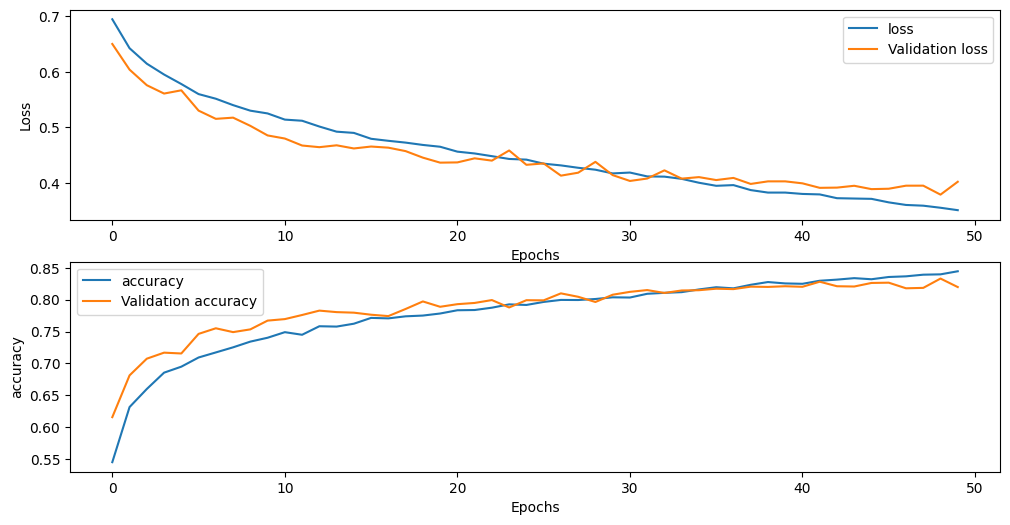

In [ ]:
def get_total_history(history1 , history2):
  total_acc = history1.history['accuracy'] + history2.history['accuracy']
  total_loss = history1.history['loss'] + history2.history['loss']

  total_val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
  total_val_loss = history1.history['val_loss'] + history2.history['val_loss']

  plt.figure(figsize = (12 , 6))
  plt.subplot(2 , 1 , 1)
  plt.plot(total_loss , label = "loss")
  plt.plot(total_val_loss , label = "Validation loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend();

  plt.subplot(2 , 1 , 2)
  plt.plot(total_acc , label = "accuracy")
  plt.plot(total_val_acc , label = "Validation accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend();

get_total_history(history_4 , history_4_2)

Our model_4 seems to be quite robust to overfitting even after 50 epochs. This is because the usage of dropout and data augmentation layer together , which is considered as regularization technique.

Finally we have beaten our baseline with a model that is not overfitting

In [ ]:
# Saving our model
import os
save_dir = "drive/MyDrive/ComputerVision/DogsvsCats4/Three_Block_dropout_data_aug_30"
os.makedirs(save_dir) # Make directory if it doesn't exist

# Save model
model_4.save(save_dir)

# reloding our model and testing
load_saved_model = tf.keras.models.load_model(save_dir)
load_saved_model.evaluate(test_data_pipe)

146/146 [==============================] - 7s 50ms/step - loss: 0.4020 - accuracy: 0.8199


[0.4020002484321594, 0.819862425327301]

## Testing on custom data
This prediction test is on my lovely dog.

In [ ]:
# Function to load , prep and predict on our custom image
def load_prep_plot_image(model , filename , class_names , img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img , channels = 3)
  img = tf.image.resize(img , size = [img_shape , img_shape])
  img = img/255.
  pred = model.predict(tf.expand_dims(img , axis = 0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


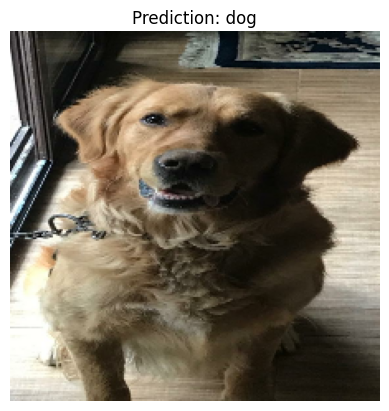

In [ ]:
load_prep_plot_image(model_4 , '/content/Pluto_image.jpeg' , class_names)

Amazing! Our model predicted pluto correctly!

## Recap on this notebook:
In this notebook we created several models trained on the Cats vs Dogs datasets found on kaggle.

Our experiments:
1. Experiment 0 (model_0):
  - This is a model using a one block vgg architecture. It had a validation accuracy of ~72% and training accuracy of ~92% , which means model_0 was severly overfitting.

2. Experiment 1 (model_1):
    - This is a model using a two block vgg architecture. It had a validation accuracy of ~76% and training accuracy of ~99% , which means model_1 was severly overfitting.

3. Experiment_2 (model_2):
    - This is a model using a three block vgg architecture. It had a validation accuracy of ~78% and training accuracy of ~99% , which means model_2 was severly overfitting.

3. Experiment_3 (model_3):
    - This is a model using a three block vgg architecture + adding dropout layers as a regularization technique. It had a validation accuracy of ~78% and training accuracy of ~84% , which means model_3 is generalizing well on the test data

4. Experiment_4 (model_3):
    - In this experiment we trained model_3 for an extra 30 epochs. It had a validation accuracy of ~81% and training accuracy of ~96% , which means that model_3 started overfitting on the training data

5. Experiment (model_4):
  - Model_4 is similar to model_3 but we added a data augmentaion layer. It had a validation accuracy of ~77% and training accuracy of ~78% , which means that model_4 is generalizing pretty well on our training data.

6. Experiment (model_4):
  - In this experiment we trained model_4 for an extra 30 epochs. It had a validation accuracy of ~82% and training accuracy of ~0.85% , which means that after 50 epochs our model is generlaizing pretty well on our training data.

In these 6 experiments, we were able to surpass our baseline of 80% validation accuracy, reaching up to ~82%.


Other experiments that can be done:
1. Training for more epochs
2. Get more data
3. Try weight decay regularization
4. Try lrscheduler to squeeze some extra percentages
5. Use transfer learning